In [3]:
import keras
from keras import layers

In [4]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [5]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [6]:
#Let's also create a separate encoder model:

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [7]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [8]:
#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [10]:
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
# Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2745 - val_loss: 0.1897
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1716 - val_loss: 0.1546
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1449 - val_loss: 0.1342
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1291 - val_loss: 0.1221
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1195 - val_loss: 0.1145
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1127 - val_loss: 0.1084
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1073 - val_loss: 0.1037
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1031 - val_loss: 0.1002
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1000 - val_loss: 0.0976
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0978 - val_loss: 0.0

In [12]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


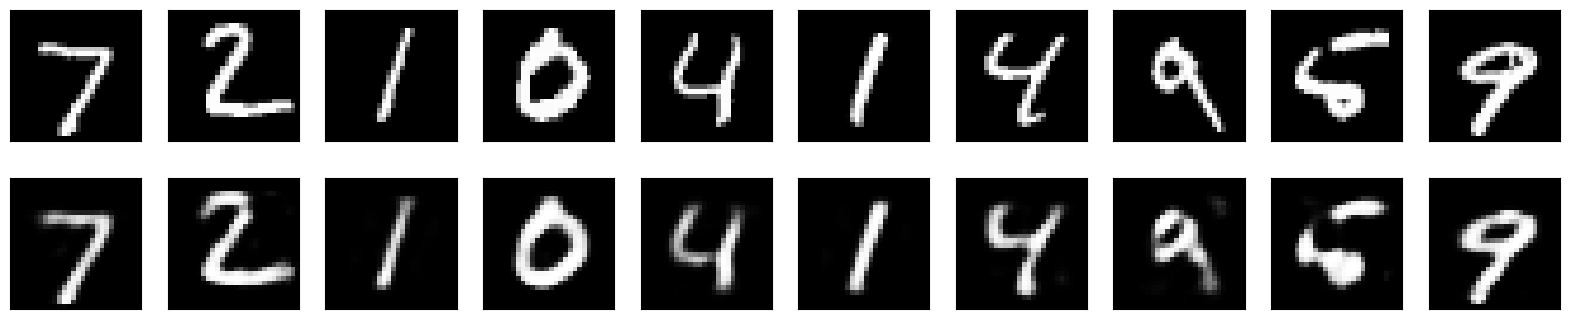

In [13]:
# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [15]:
#Let's also create a separate encoder model:

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [16]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [17]:
#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [19]:
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
# Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2826 - val_loss: 0.1962
Epoch 2/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1787 - val_loss: 0.1617
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1523 - val_loss: 0.1420
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1374 - val_loss: 0.1308
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1284 - val_loss: 0.1237
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1222 - val_loss: 0.1184
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1175 - val_loss: 0.1143
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1138 - val_loss: 0.1110
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1112 - val_loss: 0.1088
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1093 - val_loss: 0

In [21]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


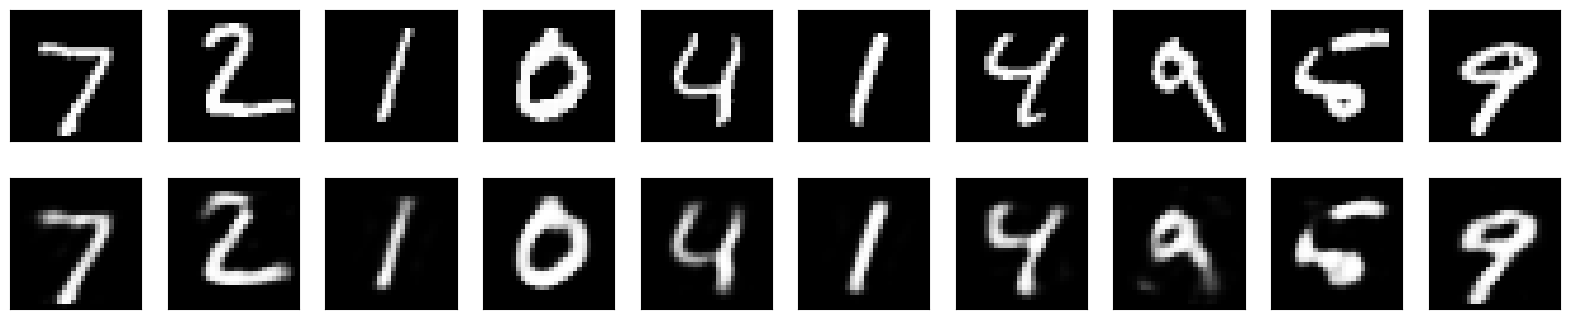

In [22]:
# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep autoencoder

We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:

In [23]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [24]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 5s 13ms/step - loss: 0.2453 - val_loss: 0.1683
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1533 - val_loss: 0.1410
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1345 - val_loss: 0.1260
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1235 - val_loss: 0.1182
Epoch 5/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1171 - val_loss: 0.1136
Epoch 6/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1130 - val_loss: 0.1098
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1099 - val_loss: 0.1073
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1070 - val_loss: 0.1044
Epoch 9/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1045 - val_loss: 0.1023
Epoch 10/100
235/235 [==============================] - 3s 14ms/step - loss: 0.102

235/235 [==============================] - 4s 17ms/step - loss: 0.0819 - val_loss: 0.0820
Epoch 81/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0818 - val_loss: 0.0816
Epoch 82/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0818 - val_loss: 0.0816
Epoch 83/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0817 - val_loss: 0.0815
Epoch 84/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0817 - val_loss: 0.0816
Epoch 85/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0817 - val_loss: 0.0817
Epoch 86/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0816 - val_loss: 0.0814
Epoch 87/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0816 - val_loss: 0.0815
Epoch 88/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0816 - val_loss: 0.0814
Epoch 89/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0815 - 

In [25]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


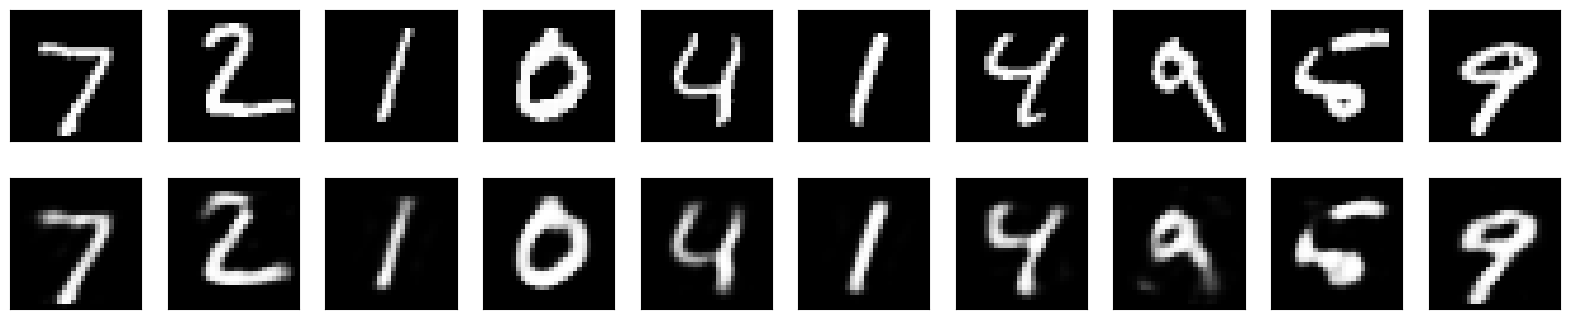

In [26]:
# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()